Importamos las librerías a usar y leemos el archivo csv

In [2]:

import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

#Cargamos el archivo de nuestro DF
car_data = pd.read_csv('../vehicles_us.csv') 

Comenzamos con el análisis exploratorio de los datos y se agrega una nueva columna llmada "marca", donde nos explica que marca tienen los coches

In [3]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [25]:
#Agregamos una nueva columna solo con las marcas
car_data['brand'] = car_data['model'].str.split().str[0]
car_data.sample(5)

car_data.to_csv('car_model.csv', index=False)

Creamos nuestra primera gráfica de número de coches por marca en el inventario.

Este gráfico es útil para ver qué marcas dominan en el inventario.

/var/folders/j1/8k_4v_7s4ybdycf9tt0tdxtw0000gn/T/ipykernel_2011/1133317077.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=car_data, y='brand', order=car_data['brand'].value_counts().index, palette='viridis')


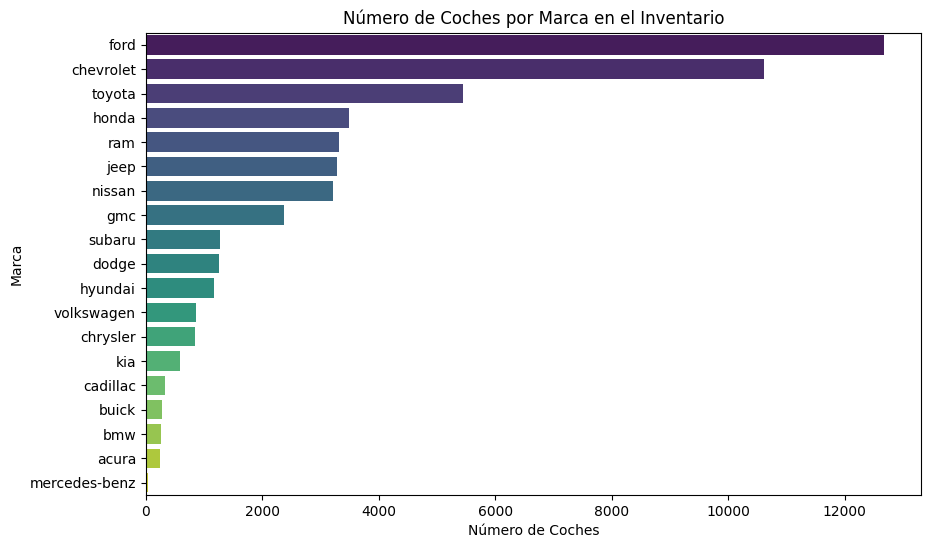

In [5]:
    plt.figure(figsize=(10, 6))
sns.countplot(data=car_data, y='brand', order=car_data['brand'].value_counts().index, palette='viridis')
plt.title('Número de Coches por Marca en el Inventario')
plt.xlabel('Número de Coches')
plt.ylabel('Marca')
plt.show()

Se agregó un histograma de precios de coches, pero este se limito únicamente a precios por debajo de los 25,000 se tomo esta decisión para que el usuario pudiera visualizar de mejor manera los precios, ya que en el primer gráfico tenemos outliers, que hacen que no se pueda ver correctamente la gráfica.

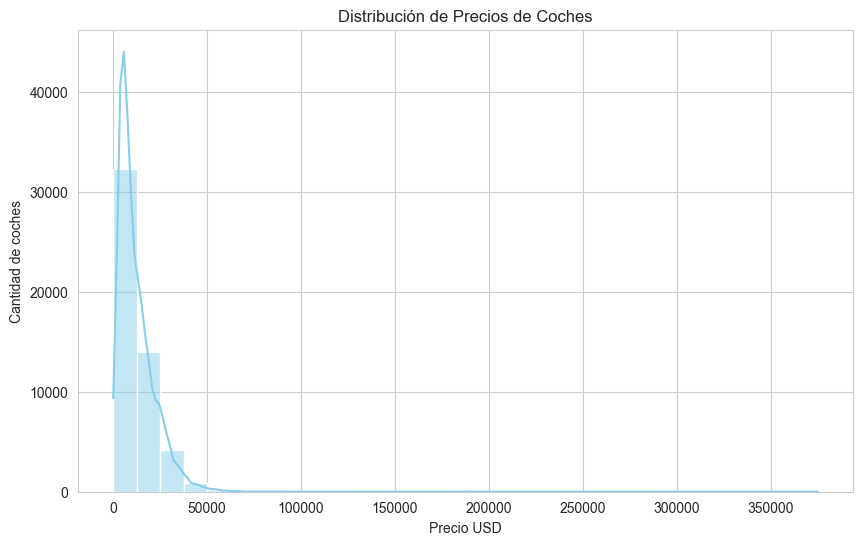

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(car_data['price'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de Precios de Coches')
plt.xlabel('Precio USD')
plt.ylabel('Cantidad de coches')
plt.show()

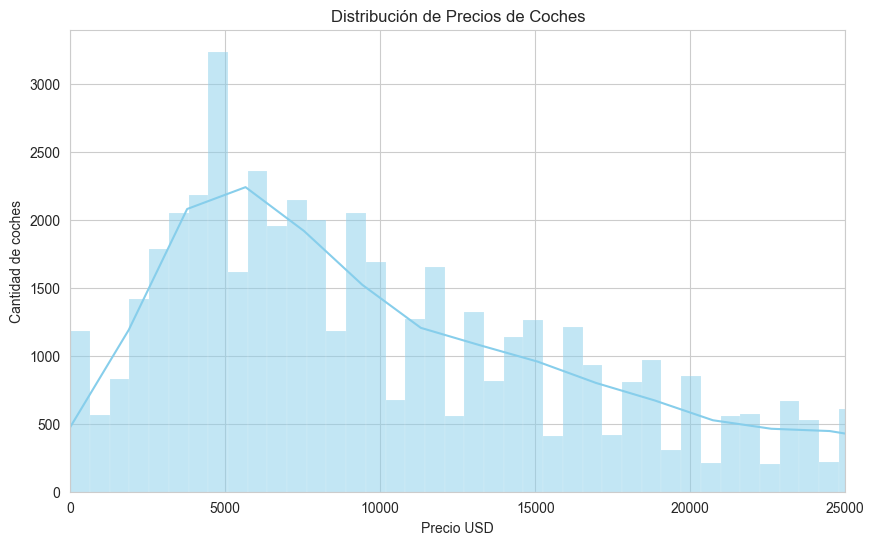

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(car_data['price'], kde=True, color='skyblue')
plt.xlim(0,25000)
plt.title('Distribución de Precios de Coches')
plt.xlabel('Precio USD')
plt.ylabel('Cantidad de coches')
plt.show()

Creamos un gráfico de barras para mostrar la cantidad de Vehículos disponibles por cada año de fabricación.

/var/folders/j1/8k_4v_7s4ybdycf9tt0tdxtw0000gn/T/ipykernel_2011/2601203198.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




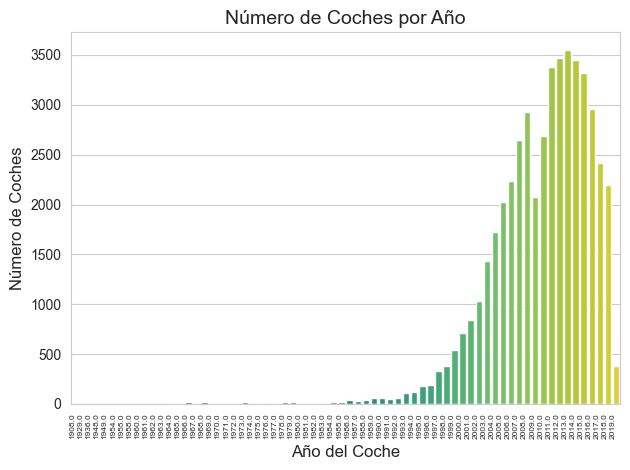

In [47]:
sns.countplot(data=car_data, x='model_year', palette='viridis')
plt.title('Número de Coches por Año', fontsize=14)
plt.xlabel('Año del Coche', fontsize=12)
plt.ylabel('Número de Coches', fontsize=12)
plt.xticks(rotation=90, ha= 'right', fontsize=6) # Rota las etiquetas del eje X para mejor legibilidad
plt.tight_layout()

In [15]:
car_data['condition'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

/var/folders/j1/8k_4v_7s4ybdycf9tt0tdxtw0000gn/T/ipykernel_2011/2712905529.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=car_data, x='condition', order=condicion_orden, palette='viridis')


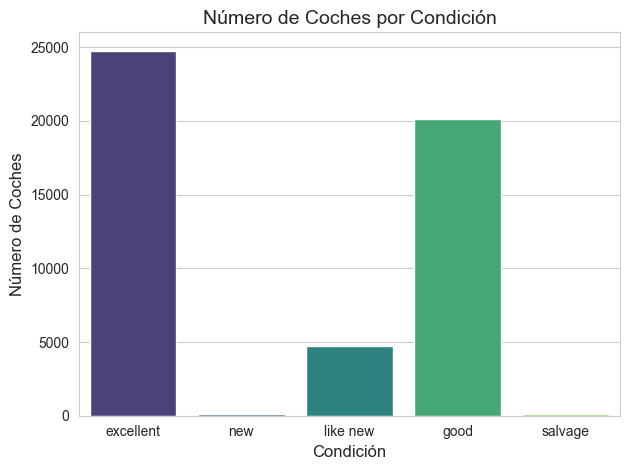

In [ ]:
# --- 5. Gráfico de Barras de Condición ---

condicion_orden = ['excellent', 'new', 'like new', 'good', 'salvage']
sns.countplot(data=car_data, x='condition', order=condicion_orden, palette='viridis')
plt.title('Número de Coches por Condición', fontsize=14)
plt.xlabel('Condición', fontsize=12)
plt.ylabel('Número de Coches', fontsize=12)
plt.tight_layout()

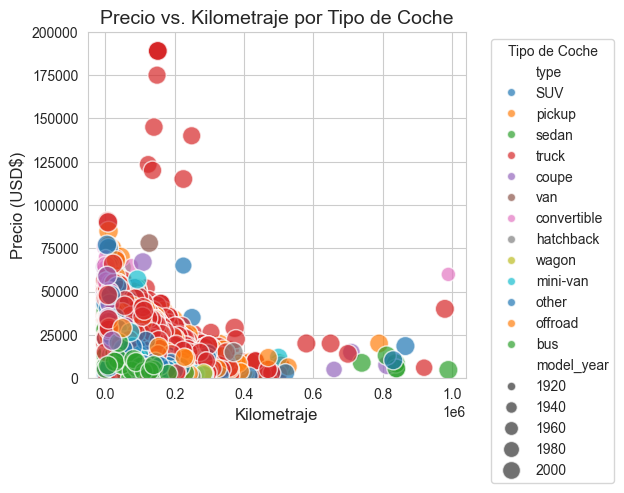

In [ ]:
# Construyendo un histograma mediante plotly-express
fig = px.histogram(car_data, x="odometer") # crear un histograma
fig.show() # crear gráfico de dispersión

# Construyendo un gráfico de dispersión
fig = px.scatter(car_data, x="odometer", y="price") # crear un gráfico de dispersión
fig.show() # crear gráfico de dispersión

# --- 6. Gráfico de Dispersión (Scatter Plot) de Kilometraje vs. Precio ---
sns.scatterplot(data=car_data, x='odometer', y='price', hue='type', size='model_year', alpha=0.7, palette='tab10')
plt.title('Precio vs. Kilometraje por Tipo de Coche', fontsize=14)
plt.ylim(0,200000)
plt.xlabel('Kilometraje', fontsize=12)
plt.ylabel('Precio (USD$)', fontsize=12)
plt.legend(title='Tipo de Coche', bbox_to_anchor=(1.05, 1), loc='upper left') # Mueve la leyenda fuera del gráfico
plt.tight_layout()